In [3]:
from sklearn.cross_decomposition import CCA
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pickle
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

In [4]:
#Load the kinematics for hand and target in the simulation
#The corresponding kinematics file will be saved as test_kinematics_hand(/target)_test_data_filename(in test configs file)

hand_kin = np.load("./kinematics_hand_test.npy")
target_kin = np.load("./kinematics_target_test.npy")

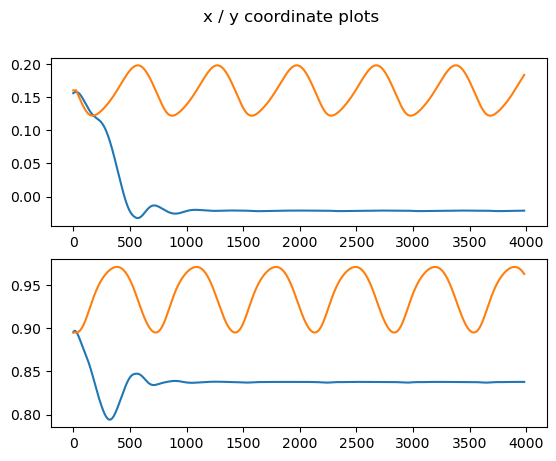

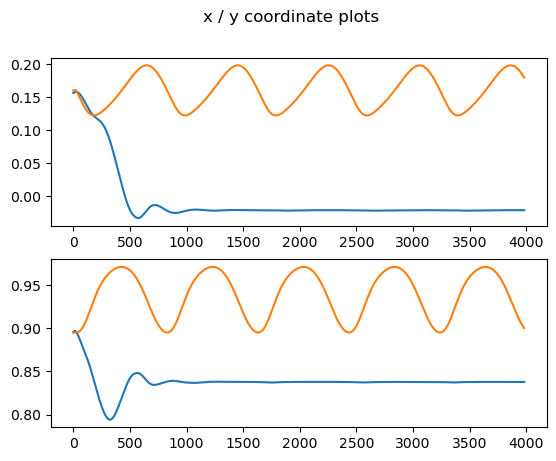

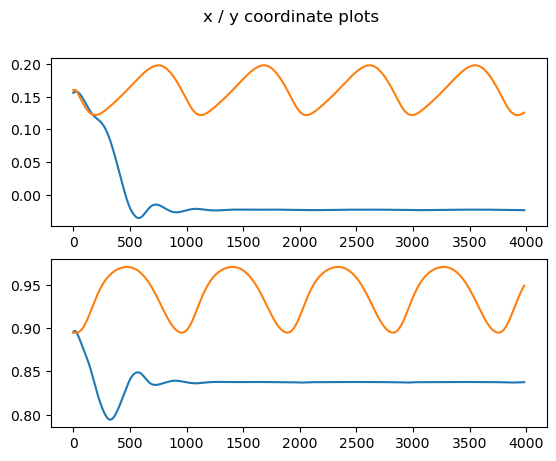

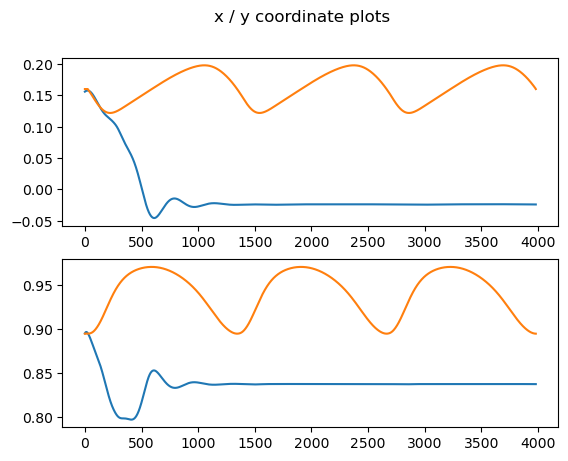

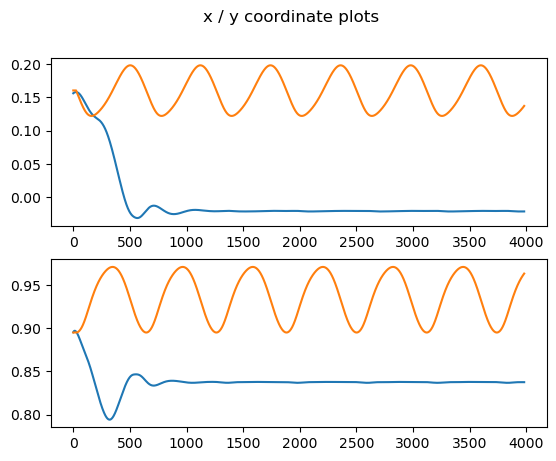

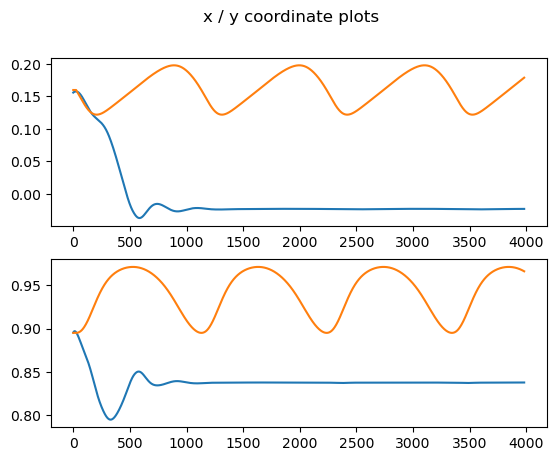

In [5]:
#Plot musim kinematics with targets for easy visualization
#kin shape: [n_test+train_conds, simulation_timepoints, 3]

for i_cond in range(hand_kin.shape[0]):
    #Get the hand and target kinematics for the given condition
    h_x = hand_kin[i_cond, :, 0]
    h_y = hand_kin[i_cond, :, 2]
    
    t_x = target_kin[i_cond, :, 0]
    t_y = target_kin[i_cond, :, 2]
    
    fig, axs = plt.subplots(2)
    fig.suptitle('x / y coordinate plots')
    
    axs[0].plot(h_x)
    axs[0].plot(t_x)
    
    axs[1].plot(h_y)
    axs[1].plot(t_y)
    
    plt.show()

In [6]:
#Load experimental for training and testing

with open("./Neural_Analysis/Training/exp_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    exp_train = pickle.load(file)

with open("./Neural_Analysis/Testing/exp_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    exp_test = pickle.load(file)

    
#Load the nusim activities for training and testing
nusim_activity_train_test = np.load("./hidden_act_test.npy")

nusim_train = {}
for i_cond in range(len(exp_train)):
    nusim_train[i_cond] = nusim_activity_train_test[i_cond]
    #Select last timepoints for analysis
    nusim_train[i_cond] = nusim_train[i_cond][-1*exp_train[i_cond].shape[0]:, :]

nusim_test = {}
for i_cond in range(len(exp_test)):
    nusim_test[i_cond] = nusim_activity_train_test[i_cond+len(exp_train)]
    nusim_test[i_cond] = nusim_test[i_cond][-1*exp_test[i_cond].shape[0]:, :]

R2 nuSim, Condition Train1 -0.5106714796536077
R2 Open Loop RNN, Condition Train1 0.8495719489895228


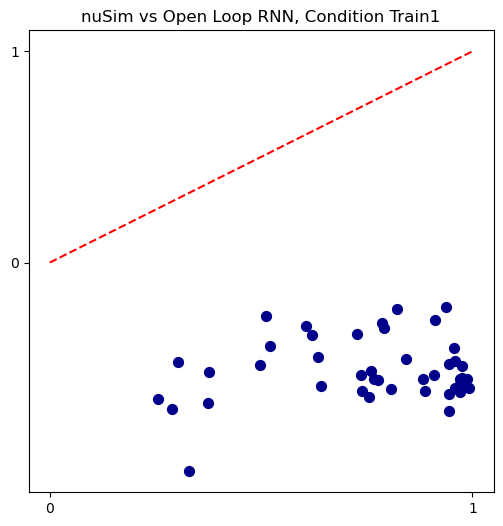

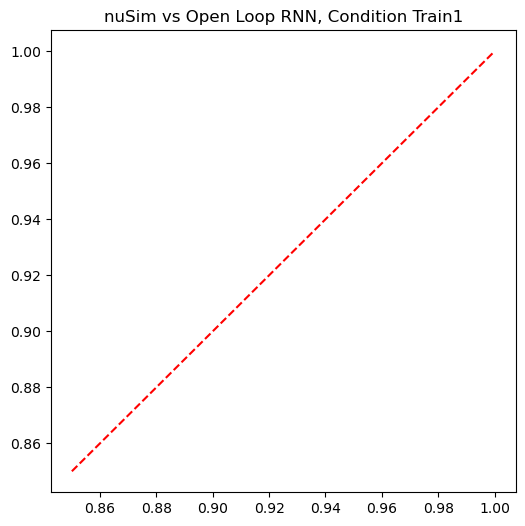

R2 nuSim, Condition Train2 -0.9180926504995434
R2 Open Loop RNN, Condition Train2 0.9621371582062128


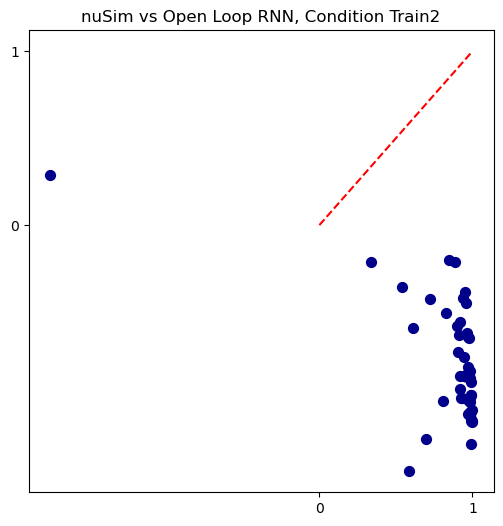

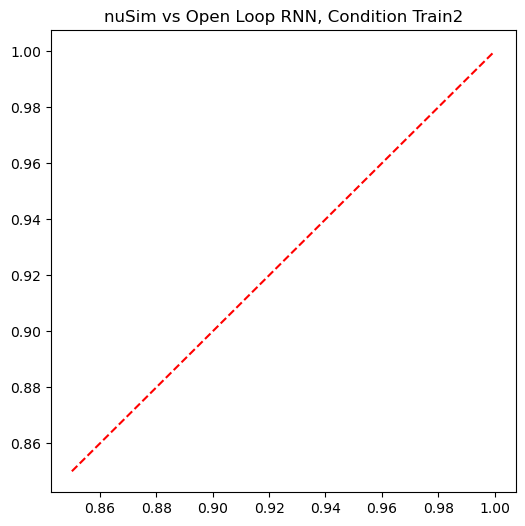

R2 nuSim, Condition Train3 -0.34336379482209256
R2 Open Loop RNN, Condition Train3 0.9372738448958554


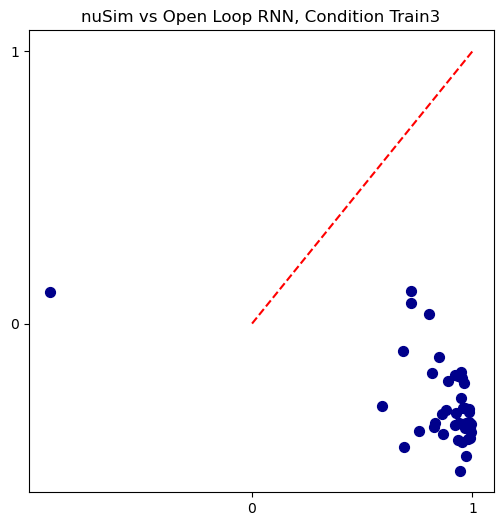

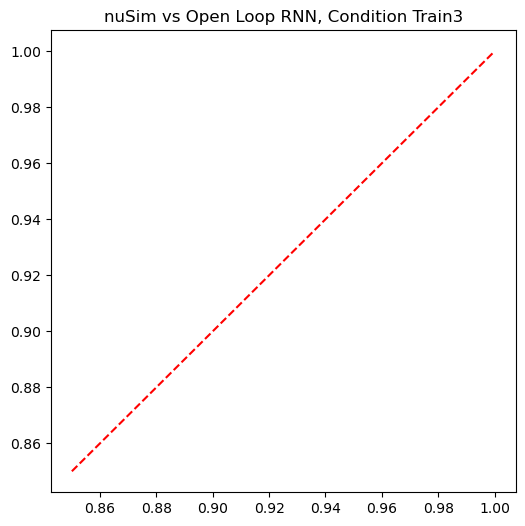

R2 nuSim, Condition Train4 -1.5277749602999924
R2 Open Loop RNN, Condition Train4 0.511092889713275


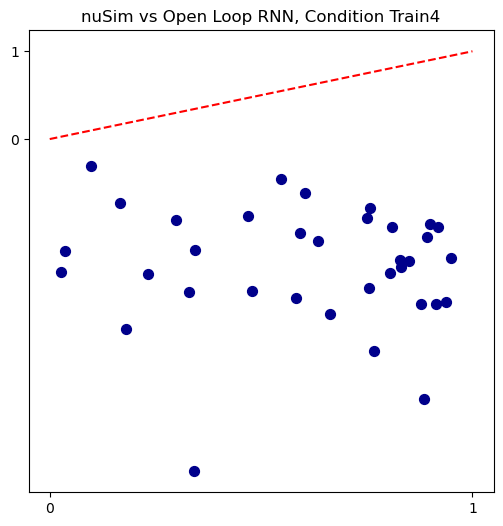

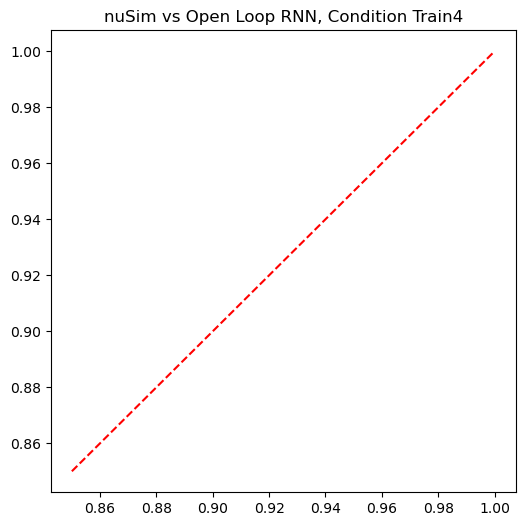

R2 nuSim, Condition Test1 -0.9707537154814987
R2 Open Loop RNN, Condition Test1 -4.461028874916974


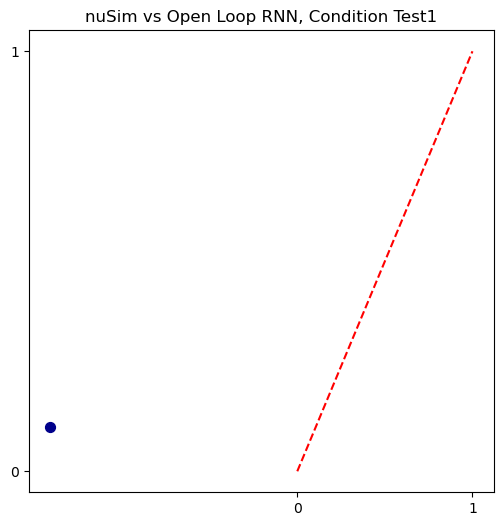

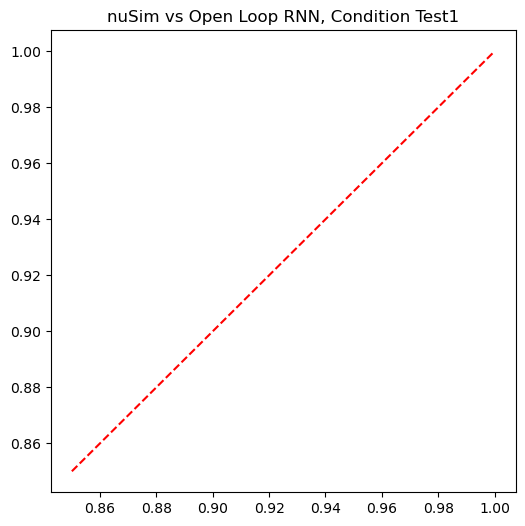

R2 nuSim, Condition Test2 -1.3003432688189571
R2 Open Loop RNN, Condition Test2 -1.1169566642527267


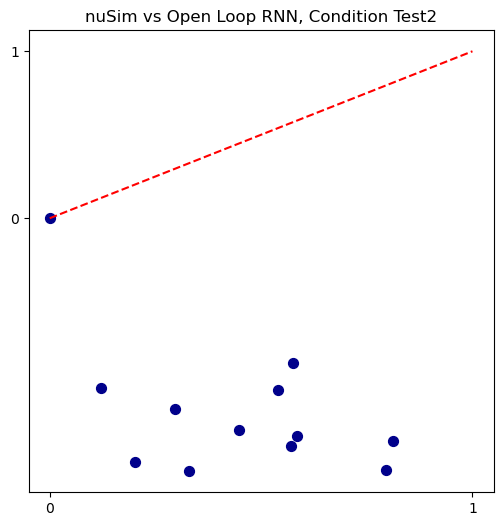

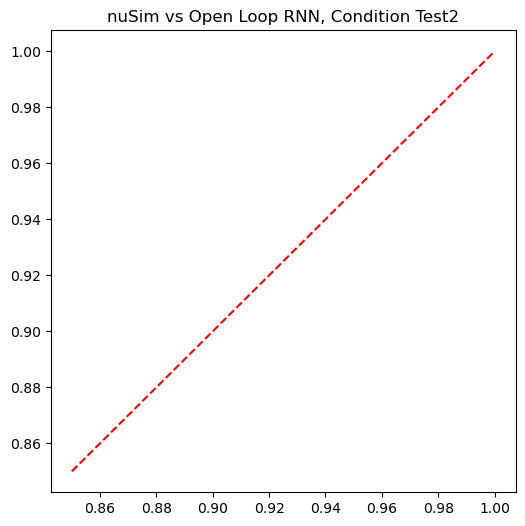

R2 nuSim, Condition Train1 -0.5106714796536077
R2 EMG, Condition Train1 0.8789061505587537


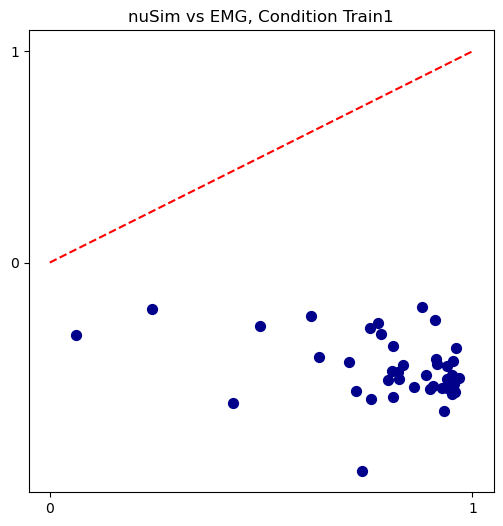

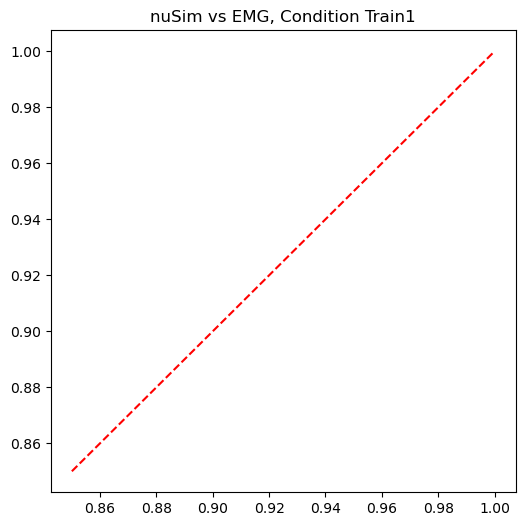

R2 nuSim, Condition Train2 -0.9180926504995434
R2 EMG, Condition Train2 0.9072365891133923


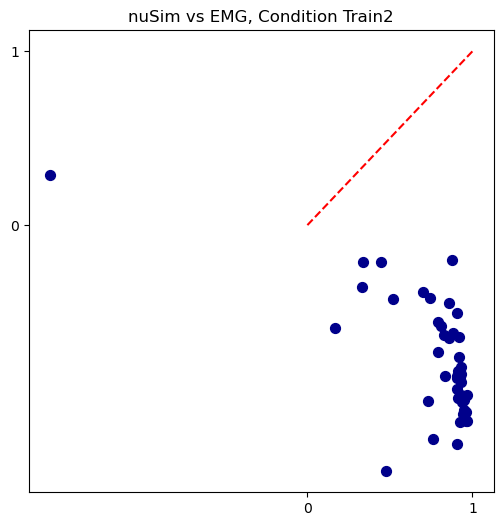

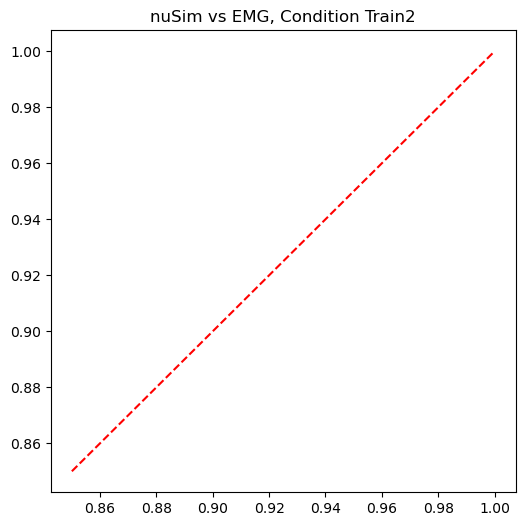

R2 nuSim, Condition Train3 -0.34336379482209256
R2 EMG, Condition Train3 0.8786104254018511


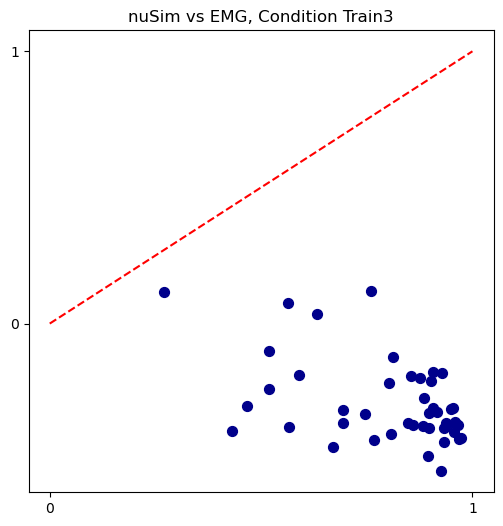

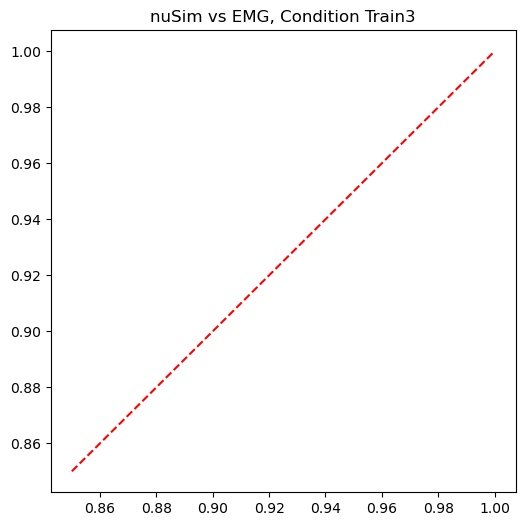

R2 nuSim, Condition Train4 -1.5277749602999924
R2 EMG, Condition Train4 0.6702731900371596


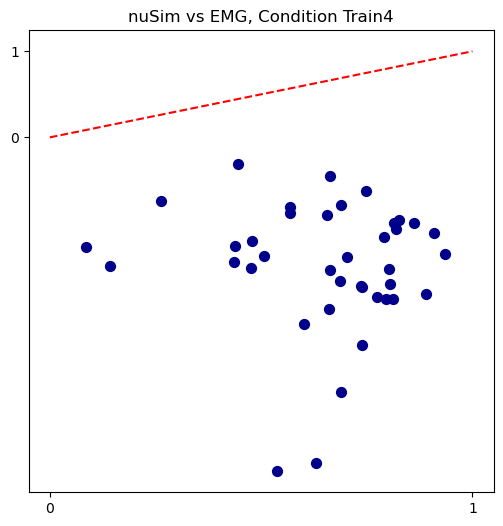

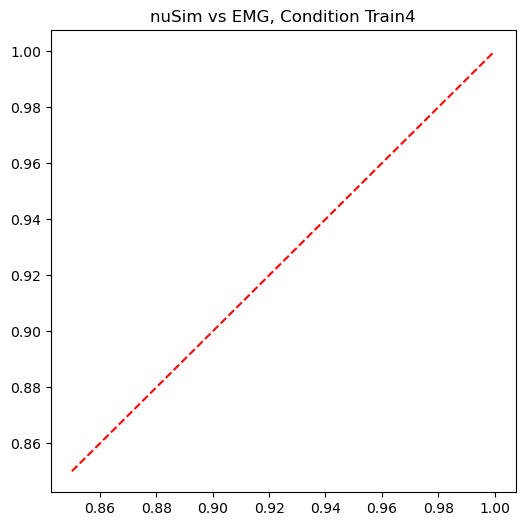

R2 nuSim, Condition Test1 -0.9707537154814987
R2 EMG, Condition Test1 0.6245329881534161


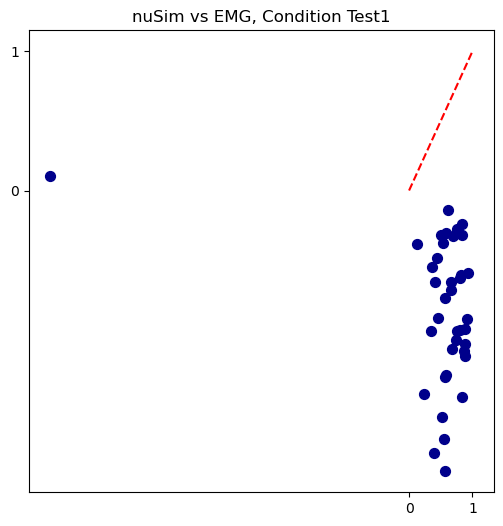

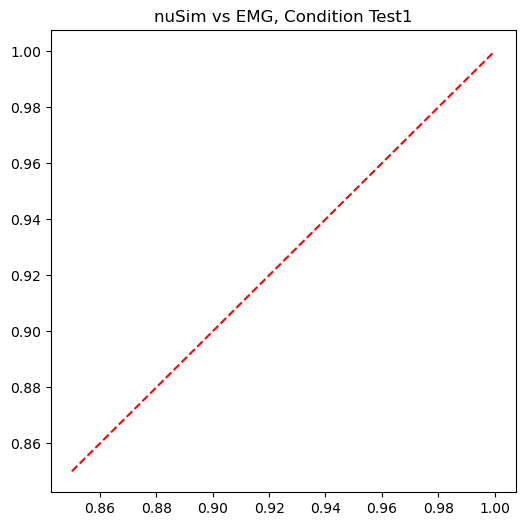

R2 nuSim, Condition Test2 -1.3003432688189571
R2 EMG, Condition Test2 0.8998887033187078


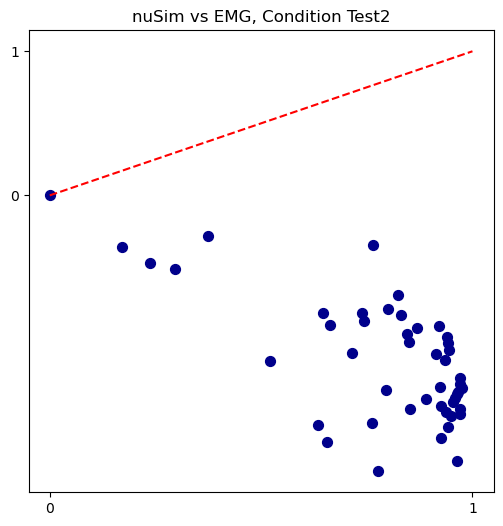

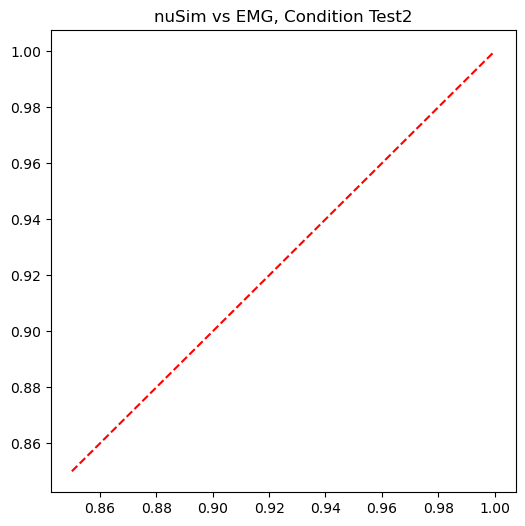

R2 nuSim, Condition Train1 -0.5106714796536077
R2 Kinematics, Condition Train1 0.7701087787429126


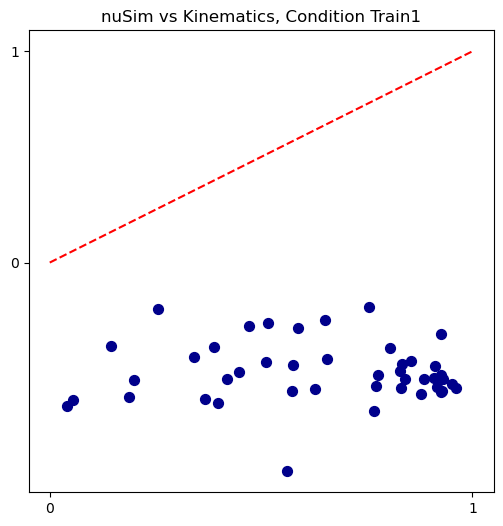

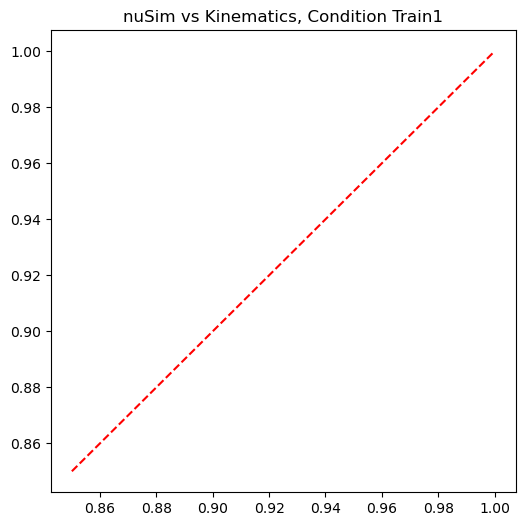

R2 nuSim, Condition Train2 -0.9180926504995434
R2 Kinematics, Condition Train2 0.831614948718129


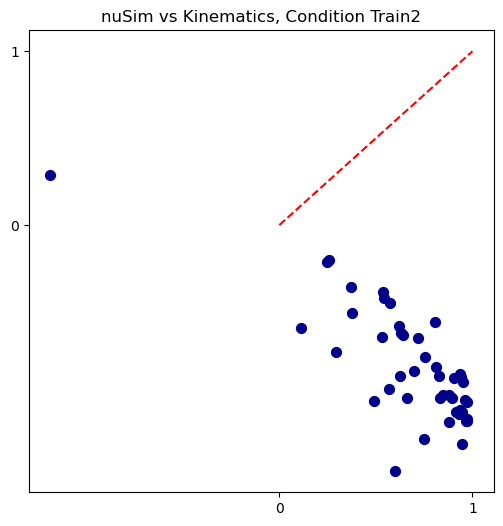

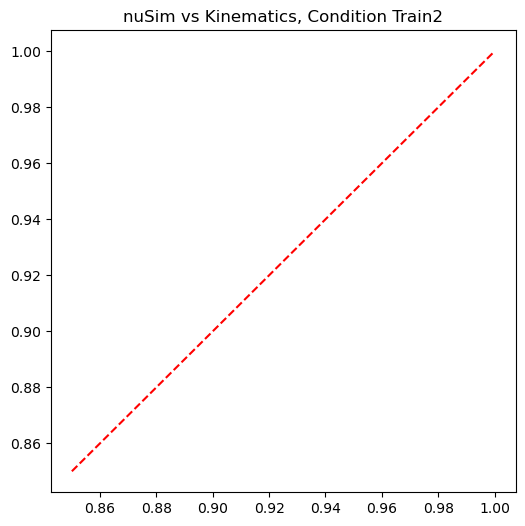

R2 nuSim, Condition Train3 -0.34336379482209256
R2 Kinematics, Condition Train3 0.8260628638889259


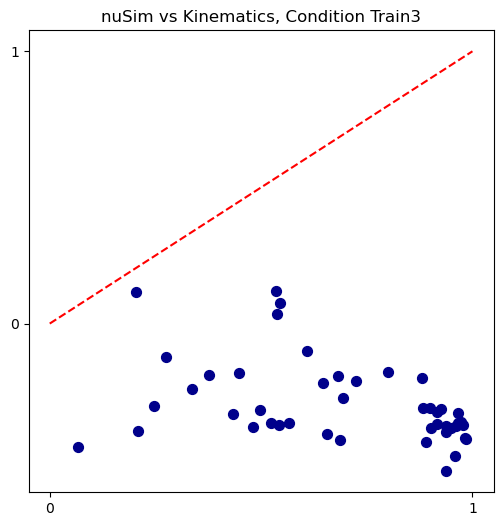

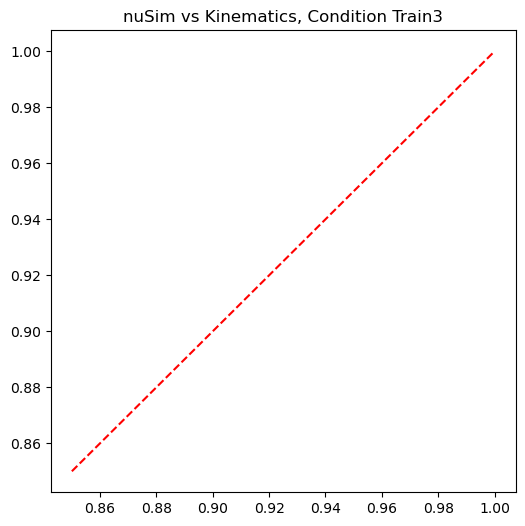

R2 nuSim, Condition Train4 -1.5277749602999924
R2 Kinematics, Condition Train4 0.5917282000286103


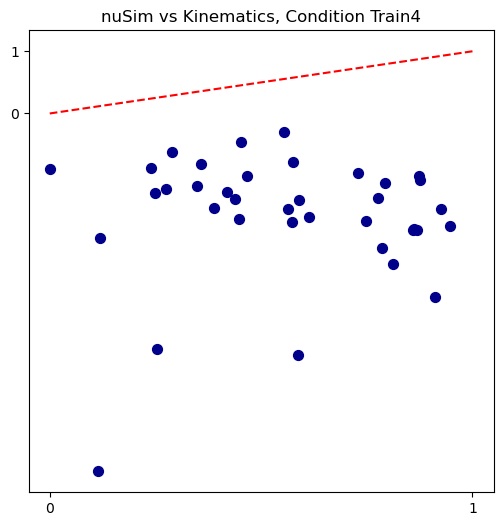

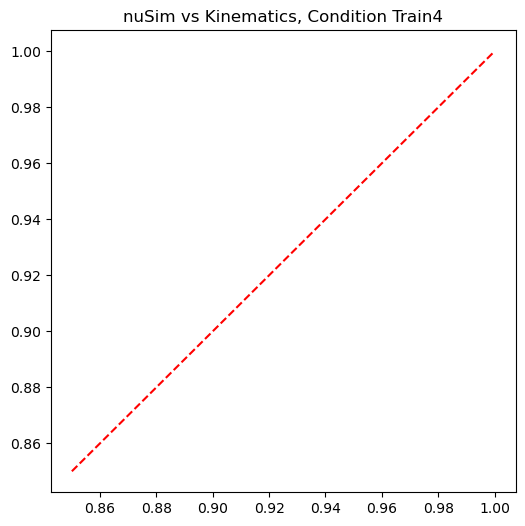

R2 nuSim, Condition Test1 -0.9707537154814987
R2 Kinematics, Condition Test1 0.671065048328222


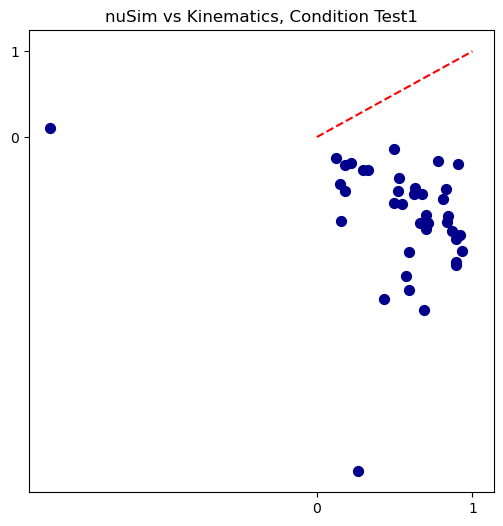

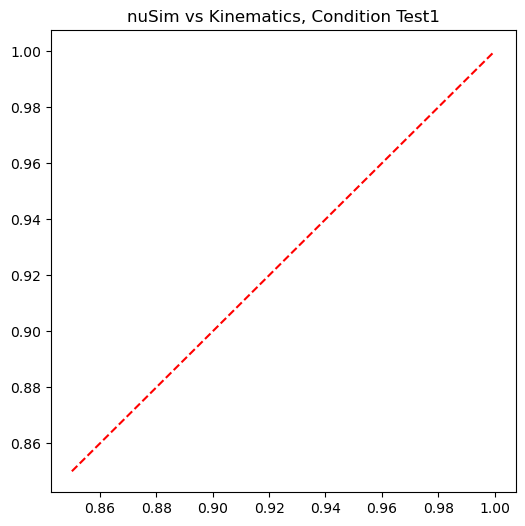

R2 nuSim, Condition Test2 -1.3003432688189571
R2 Kinematics, Condition Test2 0.7790985858152499


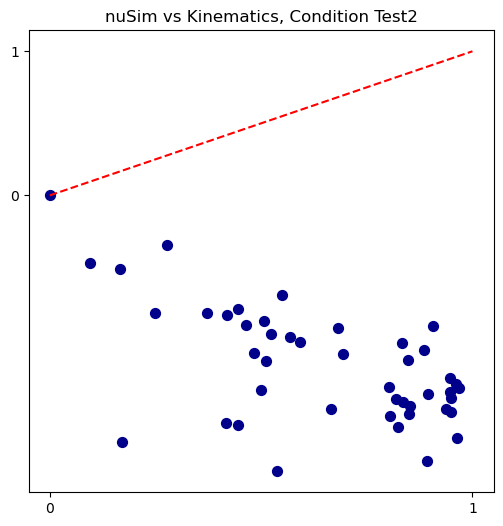

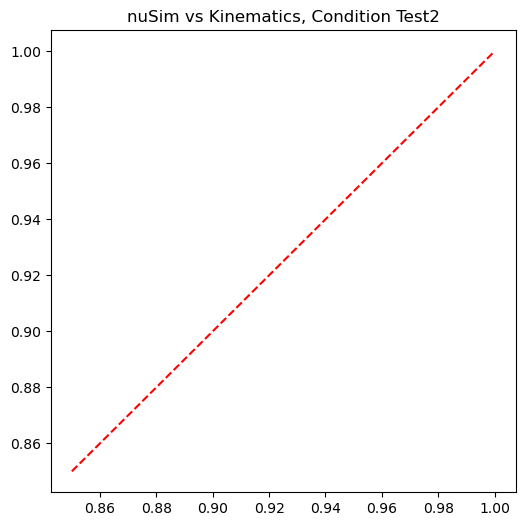

In [7]:
#Load emg for training and testing

with open("./Neural_Analysis/Training/emg_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    emg_train = pickle.load(file)

with open("./Neural_Analysis/Testing/emg_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    emg_test = pickle.load(file)

#Load kinematics for training and testing

with open("./Neural_Analysis/Training/kin_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    kin_train = pickle.load(file)

with open("./Neural_Analysis/Testing/kin_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    kin_test = pickle.load(file)

#Load the RNN activities for training and testing

with open("./Neural_Analysis/Training/RNN_train.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    rnn_train = pickle.load(file)

with open("./Neural_Analysis/Testing/RNN_test.pkl", 'rb') as file:
    # Deserialize and retrieve the variable from the file
    rnn_test = pickle.load(file)

#Replaced:    A_agent --> A_nusim;   A_exp_619 --> A_exp_held_out; A_nusim_619 --> A_nusim_held_out; 
# pred_net --> pred_nusim; r2_array_net --> r2_array_nusim
# A_RNN --> A_other

#Assign the exp, nusim and other activities
#Merge both the training and testing activities dicts

#First make the keys of all testing different from training
for idx in range(len(exp_test)):
    #Exp
    exp_test[idx+len(exp_train)] = exp_test[idx]
    del exp_test[idx]

    #nuSim
    nusim_test[idx+len(nusim_train)] = nusim_test[idx]
    del nusim_test[idx]

    #emg
    emg_test[idx+len(emg_train)] = emg_test[idx]
    del emg_test[idx]

    #kinematics
    kin_test[idx+len(kin_train)] = kin_test[idx]
    del kin_test[idx]

    #rnn
    rnn_test[idx+len(rnn_train)] = rnn_test[idx]
    del rnn_test[idx]


A_exp_all = {**exp_train, **exp_test}
A_nusim_all ={**nusim_train, **nusim_test}

#Now carry this out for all the training and testing conditions
#i_cond is the held_out condition

#Repeat this for rnn, emg and kin
#Create an array representing all the conditions
A_other_all_models = [{**rnn_train, **rnn_test}, {**emg_train, **emg_test}, {**kin_train, **kin_test}]
model_names = ['Open Loop RNN', 'EMG', 'Kinematics']

for i_comparison in range(len(A_other_all_models)):

    A_other_all = A_other_all_models[i_comparison]

    for i_cond in range(len(A_exp_all)):

        A_exp_held_out = A_exp_all[i_cond]
        A_nusim_held_out = A_nusim_all[i_cond]
        A_other_held_out = A_other_all[i_cond]

        flag_first = 0
        #Concatenate the experimental, nusim and other comparative model activities
        for idx in range(len(A_exp_all)):

            if idx != i_cond:
                if flag_first == 0:
                    A_exp = A_exp_all[idx]

                    #Preprocess the nuSim activities as done with experimental preprocessing
                    A_nusim = A_nusim_all[idx]

                    A_other = A_other_all[idx]
                    flag_first = 1
                else:
                    A_exp = np.concatenate((A_exp, A_exp_all[idx]), axis= 0)
                    A_nusim = np.concatenate((A_nusim, A_nusim_all[idx]), axis= 0)
                    A_other = np.concatenate((A_other, A_other_all[idx]), axis= 0)


        # A_exp = np.concatenate((A_exp_702, A_exp_803, A_exp_932, A_exp_1106, A_exp_1319), axis=0)
        # A_nusim = np.concatenate((A_agent_702, A_agent_803, A_agent_932, A_agent_1106, A_agent_1319), axis= 0)

        reg_net = Ridge(alpha= 5e-02).fit(A_nusim, A_exp)
        #
        pred_nusim_held_out = reg_net.predict(A_nusim_held_out)

        if i_cond < len(nusim_train):
            print(f"R2 nuSim, Condition Train{i_cond+1}", r2_score(A_exp_held_out, pred_nusim_held_out, multioutput= 'variance_weighted'))
        else:
            print(f"R2 nuSim, Condition Test{i_cond+1-len(nusim_train)}", r2_score(A_exp_held_out, pred_nusim_held_out, multioutput= 'variance_weighted'))

        r2_list = []

        for k in range(pred_nusim_held_out.shape[1]):
            r_val = r2_score(A_exp_held_out[:,k], pred_nusim_held_out[:, k])
            r2_list.append(r_val)

        r2_array_nusim = np.array(r2_list)

        # A_other = np.concatenate((A_RNN_702, A_RNN_803, A_RNN_932, A_RNN_1106, A_RNN_1319), axis= 0)

        reg_other = Ridge(alpha= 5e-02).fit(A_other, A_exp)
        pred_other_held_out = reg_other.predict(A_other_held_out)

        if i_cond < len(nusim_train):
            print(f"R2 {model_names[i_comparison]}, Condition Train{i_cond+1}", r2_score(A_exp_held_out, pred_other_held_out, multioutput= 'variance_weighted'))
        else:
            print(f"R2 {model_names[i_comparison]}, Condition Test{i_cond+1-len(nusim_train)}", r2_score(A_exp_held_out, pred_other_held_out, multioutput= 'variance_weighted'))


        r2_list = []

        for k in range(pred_other_held_out.shape[1]):
            r_val = r2_score(A_exp_held_out[:,k], pred_other_held_out[:, k])
            r2_list.append(r_val)
        # print(r2_list)
        r2_array_other = np.array(r2_list)

        r2_diff = r2_array_nusim - r2_array_other
        # Change the order of the diff sort to go from the highest to the lowest index
        diff_sort = np.flip(np.argsort(r2_diff))

        ## Now use the diff_sort and pred_net and pred_emg to plot the activities of the neurons for which
        ## we have highest difference

        # plt.figure(figsize= (15, 15))

        # for idx, k in enumerate(diff_sort[:10]):
        #     # print(k)
        #     plt.plot(pred_nusim_held_out[:, k]/5 + idx*30, linewidth=3.0, c=(50/255, 205/255, 50/255))
        #     plt.plot(pred_other_held_out[:, k]/5 + idx*30, linewidth=3.0, c=(102/255, 102/255, 0/255))
        #     plt.plot(A_exp_held_out[:, k]/5 + idx*30, linewidth=3.0, c = 'k')

        # plt.ylabel('Reconstructed M1 Activity', size=14)
        # plt.xticks([])
        # plt.yticks([])
        # # plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/lin_net_vs_kin_932.eps', format='eps', dpi=600)

        # plt.show()

        ### ------------- Plot the scatter plot ------------------------------------------------------
        filter1 = np.where(np.logical_or(r2_array_nusim>=0, r2_array_other>=0))

        plt.figure(figsize= (6, 6))

        plt.scatter(r2_array_other[filter1], r2_array_nusim[filter1], s=50, c= 'darkblue')
        plt.plot([0, 1], [0, 1], '--', c= 'r', linewidth= 1.5)

        plt.xticks([0, 1], ['0', '1'], size= 10)
        plt.yticks([0, 1], ['0', '1'], size= 10)
        if i_cond < len(nusim_train):
            plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Train{i_cond+1}")
        else:
            plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Test{i_cond+1-len(nusim_train)}")
        # plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/r2_comparison_619_rnn.svg', format='svg', dpi=300, transparent= True)
        plt.show()

        ### ------------- Plot the scatter plot ------------------------------------------------------
        filter1 = np.where(np.logical_and(r2_array_nusim>=0.85, r2_array_nusim<=1))
        filter2 = np.where(np.logical_and(r2_array_other>=0.85, r2_array_other<=1))
        filter = np.intersect1d(filter1, filter2)

        plt.figure(figsize= (6, 6))

        plt.scatter(r2_array_other[filter], r2_array_nusim[filter], s=50, c= 'darkblue')
        plt.plot([0.85, 1], [0.85, 1], '--', c= 'r', linewidth= 1.5)

        # plt.xticks([0, 1], ['0', '1'], size= 10)
        # plt.yticks([0, 1], ['0', '1'], size= 10)
        if i_cond < len(nusim_train):
            plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Train{i_cond+1}")
        else:
            plt.title(f"nuSim vs {model_names[i_comparison]}, Condition Test{i_cond+1-len(nusim_train)}")
        # plt.savefig('C:/Users/malma/Dropbox/NatureFigs2/Fig2/r2_comparison_619_rnn_2.eps', format='svg', dpi=300, transparent= True)
        plt.show()